# Lab 3: Data Science in Python

### 1 Data

In this lab you will work with the Boston house price dataset. The dataset is available through SciKit-learn. Import the dataset and print its description. Then create a pandas DataFrame containing all 14 attributes in the dataset.

In [116]:
from sklearn import datasets
import pandas
import numpy as np
import matplotlib.pyplot as plt

data = datasets.load_boston()
df = pandas.DataFrame(data.data, columns=data.feature_names)
df['target'] = pandas.Series(data.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 2 Implementing OLS Regression

Create a class `OLS`. The constructor should take a DataFrame `data` and a label name `response` for the response variable. Using NumPy, an Ordinary Least Squares Regression should be fitted on the data (including intercept). This should be implemented manually, using only simple matrix operations (inverse, transposition and multiplication) but you are recommended to check your results against `scipy.linalg.lstsq` (also available as `numpy.linalg.lstsq`). The class should implement the instance functions `get_yhat` (return an ndarray representing $\hat{y}$), `get_residuals` (return an ndarray representing $y-\hat{y}$), `get_rmse` (return the root mean sqared) and `get_beta` (return the fitted $\beta$ vector as an ndarray).

In [102]:


class OLS:
    
    def __init__(self, data, response):
        self.data = data
        self.response = response
        nrow = data.shape[0]
        intercept = np.ones( (nrow,1) )
        self.X = np.concatenate((intercept, self.data.drop([response], axis=1)), axis=1)
        self.Y = self.data[response].T
        self.beta = np.dot(np.linalg.inv(np.dot(self.X.T,self.X)),np.dot(self.X.T,self.Y))
        self.yhat = np.dot(self.beta,self.X.T)
        
    def get_yhat(self):
        return self.yhat
    
    def get_residuals(self):
        return self.Y-self.get_yhat()
        
    def get_rmse(self):
        return sum(np.square(self.get_residuals()))/len(self.get_residuals())
        
    def get_beta(self):
        return self.beta
        
label = "target"
ol=OLS(df, label)
nrow = df.shape[0]
intercept = np.ones( (nrow,1) )
X = np.concatenate((intercept, df.drop([label], axis=1)), axis=1)
Y = df[label]

ol.get_beta()



array([ 3.64911033e+01, -1.07170557e-01,  4.63952195e-02,  2.08602395e-02,
        2.68856140e+00, -1.77957587e+01,  3.80475246e+00,  7.51061703e-04,
       -1.47575880e+00,  3.05655038e-01, -1.23293463e-02, -9.53463555e-01,
        9.39251272e-03, -5.25466633e-01])

### 3 Cross Validation and plotting

Implement a function `cross_validate` in the OLS class which should take one parameter, `n`, and perform n-fold cross-validation on the data supplied at creation of an OLS object.

Use `matplotlib` and the results from above to plot $y$ against in-sample $\hat{y}$ and out-of-sample cross-validated $\hat{y}$ in a scatter plot. Plot in-sample and out-out-sample in different colors. The plot should have suitable labels on both axes and a legend explaining which color represents which $\hat{y}$

TypeError: 'str' object is not callable

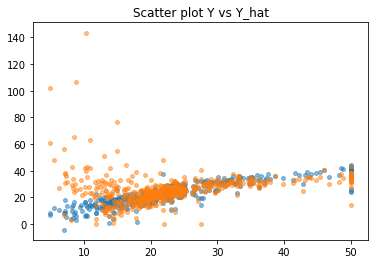

In [123]:
   
def cross_validate(self, n):
    #df = self.data.sample(self.data.shape[0], replace=False)
    df = self.data
    data = self.data
    length = int(len(df)/n)
    pred = np.zeros(len(df))
    for i in range(n):
        #Train and test index
        ind = range(i*length,(i*length)+length)
        val = df[i*length:(i*length)+length]
        train = df.drop(df.index[[ind]])
        
        #Train data
        self.data = train
        nrow = self.data.shape[0]
        intercept = np.ones( (nrow,1) )
        self.X = np.concatenate((intercept, self.data.drop([self.response], axis=1)), axis=1)
        self.Y = self.data[self.response].T
        
        #Test data
        nrowt = val.shape[0]
        interceptt = np.ones( (nrowt,1) )
        Xtest = np.concatenate((interceptt, val.drop([self.response], axis=1)), axis=1)
        
        #predict
        beta = np.dot(np.linalg.inv(np.dot(self.X.T,self.X)),np.dot(self.X.T,self.Y))
        yhat = np.dot(beta,Xtest.T)
        pred[i*length:(i*length)+length]= yhat
    
    self.data = data
    nrow = self.data.shape[0]
    intercept = np.ones( (nrow,1) )
    self.X = np.concatenate((intercept, data.drop([self.response], axis=1)), axis=1)
    self.Y = data[self.response].T
    
    #plot the scatters
    area = np.pi*5
    plt.scatter(self.Y, self.get_yhat(), s = area, alpha=0.5, label="Yhat")
    plt.scatter(self.Y, pred, s = area, alpha=0.5, label="CV Yhat")
    plt.title('Scatter plot Y vs Y_hat')
    plt.xlabel('Y_hats')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

OLS.cross_validate = cross_validate
    
i= 10
n= 0
a=np.arange(i*n,(i*n)+i)
label= "target"
ol=OLS(df, label)
ol.cross_validate(3)
yhat = ol.get_yhat()
print(len(ol.Y))


### 4 SciKit-learn

Explore SciKit-learn and select 3 regression algorithms you would like to try. Also choose some sort of shrinking, regularization or feature selection unless such is inherent in the model (as in for example LASSO or kernel SVM). Play around with any hyperparameters or, better, apply a hyper-parameter tuning algorithm (there are classes that do this in SciKit-learn). Apply the selected algorithms on the Boston data set, using cross validation to generate out-of-sample predictions (also implemented in SciKit-learn), and plot the results.

In [126]:
# 3 Regression Algorithms

# Decision Tree Regression
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train,y_train)

y_pred_decisionTree = regressor.predict(X_test)

print("MSE:",mean_squared_error(y_test, y_pred_decisionTree))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy mean:",accuracies.mean())


MSE: 36.86078431372549
Accuracy mean: 0.7494024253036036


In [127]:
# Support Vector Regression
from sklearn.svm import SVR

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# rbf = gaussian kernel, non-linear
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

y_pred_SupportVector = regressor.predict(X_test)

print("MSE:",mean_squared_error(y_test, y_pred_SupportVector))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy mean:",accuracies.mean())

MSE: 41.163532608506195
Accuracy mean: 0.6912746120209837


In [129]:
# Random Forest Regression

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 60, random_state = 0)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

print("MSE:",mean_squared_error(y_test, y_pred))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy mean:",accuracies.mean())

MSE: 18.44850776143791
Accuracy mean: 0.8602664905789178


In [130]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import ensemble
# use a full grid over all parameters
parameters = {"max_depth": [8,12,15],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["mse"],
              "max_features": (2,3,4),
              "n_estimators":[30,40,50]}

mse_scorer =  make_scorer(mean_squared_error, greater_is_better =False)
grid_search = GridSearchCV(estimator = RandomForestRegressor(),
                           param_grid = parameters,
                           scoring = mse_scorer,
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)


In [134]:
# So by using GridSearchCV for hyperparameter tuning, I increased accuracy from 0.86 to 0.90.
# Now I will use best parameter to predict prices

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(bootstrap= False,
 criterion= 'mse',
 max_depth= 12,
 max_features= 4,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 40)
regressor.fit(X_train,y_train)

y_pred_bestRandomForest = regressor.predict(X_test)

regressor.feature_importances_ # (the higher, the more important the feature).
# I can remove some of the columns which have low importance. It may increase accuracy. 
print("MSE:",mean_squared_error(y_test, y_pred_bestRandomForest))

MSE: 23.49216418168222


TypeError: 'str' object is not callable

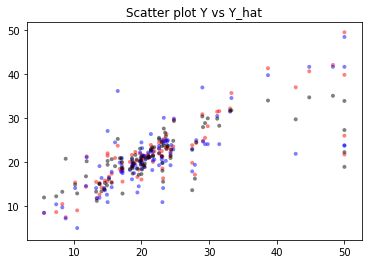

In [133]:
area = np.pi*5
plt.scatter(y_test,y_pred_bestRandomForest,  s=area, c="red", alpha=0.5,edgecolors='none', label="Random Forest")
plt.scatter(y_test,y_pred_decisionTree,  s=area, c="blue", alpha=0.5,edgecolors='none', label="Decision Tree")
plt.scatter(y_test,y_pred_SupportVector,  s=area, c="black", alpha=0.5,edgecolors='none', label="Support Vector")
plt.title('Scatter plot Y vs Y_hat')
plt.xlabel('Y_hat')
plt.ylabel('Y')
plt.legend()
plt.show()

